In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('data-engineering-pipeline/data/data.csv')

# Display the first few rows of the dataframe
data.head()

,Fp1,Fp2,F7,F8,F3,F4,Fz,C3,C4,Cz,...,CP2,CP5,CP6,POz,Oz,AFz,M1,M2,Sample,Time
0,-925.25,-781.75,-773.75,-856.25,-801.00,-798.25,-725.50,-704.50,-724.25,-800.75,...,-869.00,-940.5,-932.50,-1110.00,-880.00,-1167.75,-8185.00,-8192.0,0,0.000
1,-1218.75,-1051.75,-1041.25,-1130.50,-1067.50,-1060.25,-956.75,-943.25,-947.25,-1079.75,...,-1124.50,-1234.0,-1229.50,-1427.75,-1133.50,-1480.00,-8183.25,-8192.0,0,0.001
2,-1488.25,-1307.25,-1298.50,-1378.00,-1305.00,-1302.00,-1166.50,-1155.25,-1148.75,-1353.50,...,-1355.25,-1495.5,-1486.75,-1716.00,-1359.75,-1767.00,-8181.75,-8192.0,0,0.002
3,-1578.75,-1407.00,-1395.75,-1464.00,-1387.25,-1385.75,-1236.00,-1231.00,-1232.50,-1425.50,...,-1428.00,-1576.5,-1575.25,-1788.00,-1426.25,-1851.25,-595.25,-8192.0,0,0.003
4,-1379.75,-1250.50,-1238.00,-1280.25,-1204.00,-1206.25,-1081.50,-1080.50,-1071.50,-1235.00,...,-1225.00,-1352.5,-1351.25,-1525.75,-1212.00,-1559.50,8191.75,8184.0,0,0.004


# Time series plot

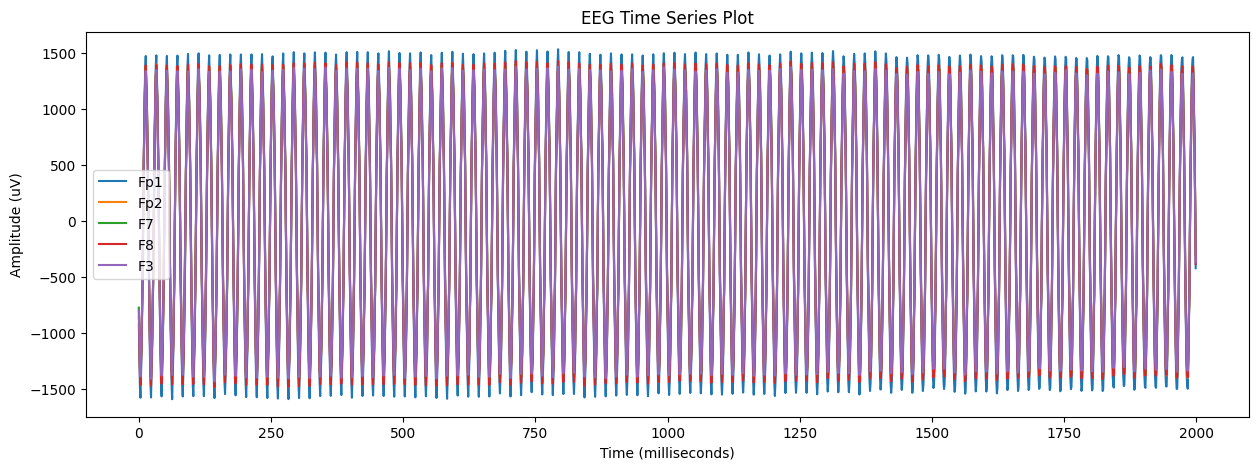

In [2]:
import matplotlib.pyplot as plt

# Assuming each column is a channel and the first column is time or index
channels = data.columns[:]  # Adjust if your format includes a time/index column
sampling_rate = 1000  # Example: 1000 Hz, adjust as per your setup

# Plot the first few seconds of EEG data for the first few channels
plt.figure(figsize=(15, 5))
for channel in channels[:5]:  # Adjust the slice for more/less channels
    plt.plot(data[channel][:sampling_rate * 2], label=channel)  # Plotting first 2 seconds

plt.title('EEG Time Series Plot')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude (uV)')
plt.legend()
plt.show()


# Spectral plot

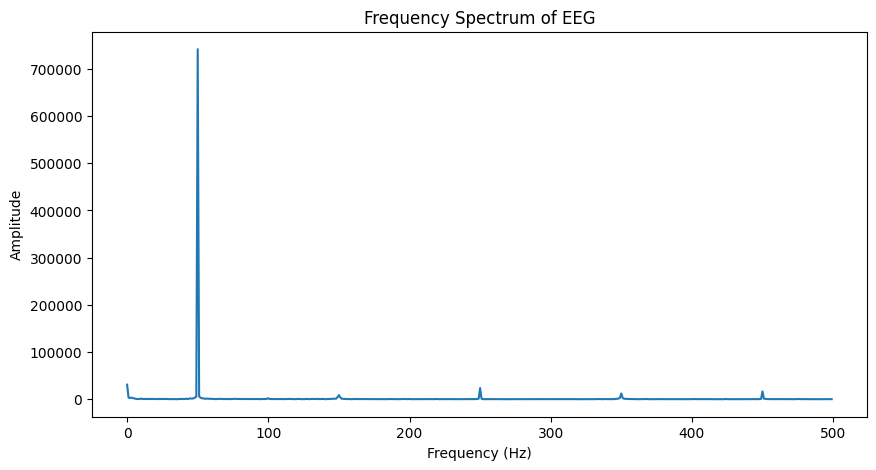

In [3]:
import numpy as np

# Assuming using the first channel for demonstration
fft_output = np.fft.fft(data[channels[0]][:sampling_rate])  # Use one second of data
frequencies = np.fft.fftfreq(sampling_rate, 1/sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_output)[:len(frequencies)//2])
plt.title('Frequency Spectrum of EEG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


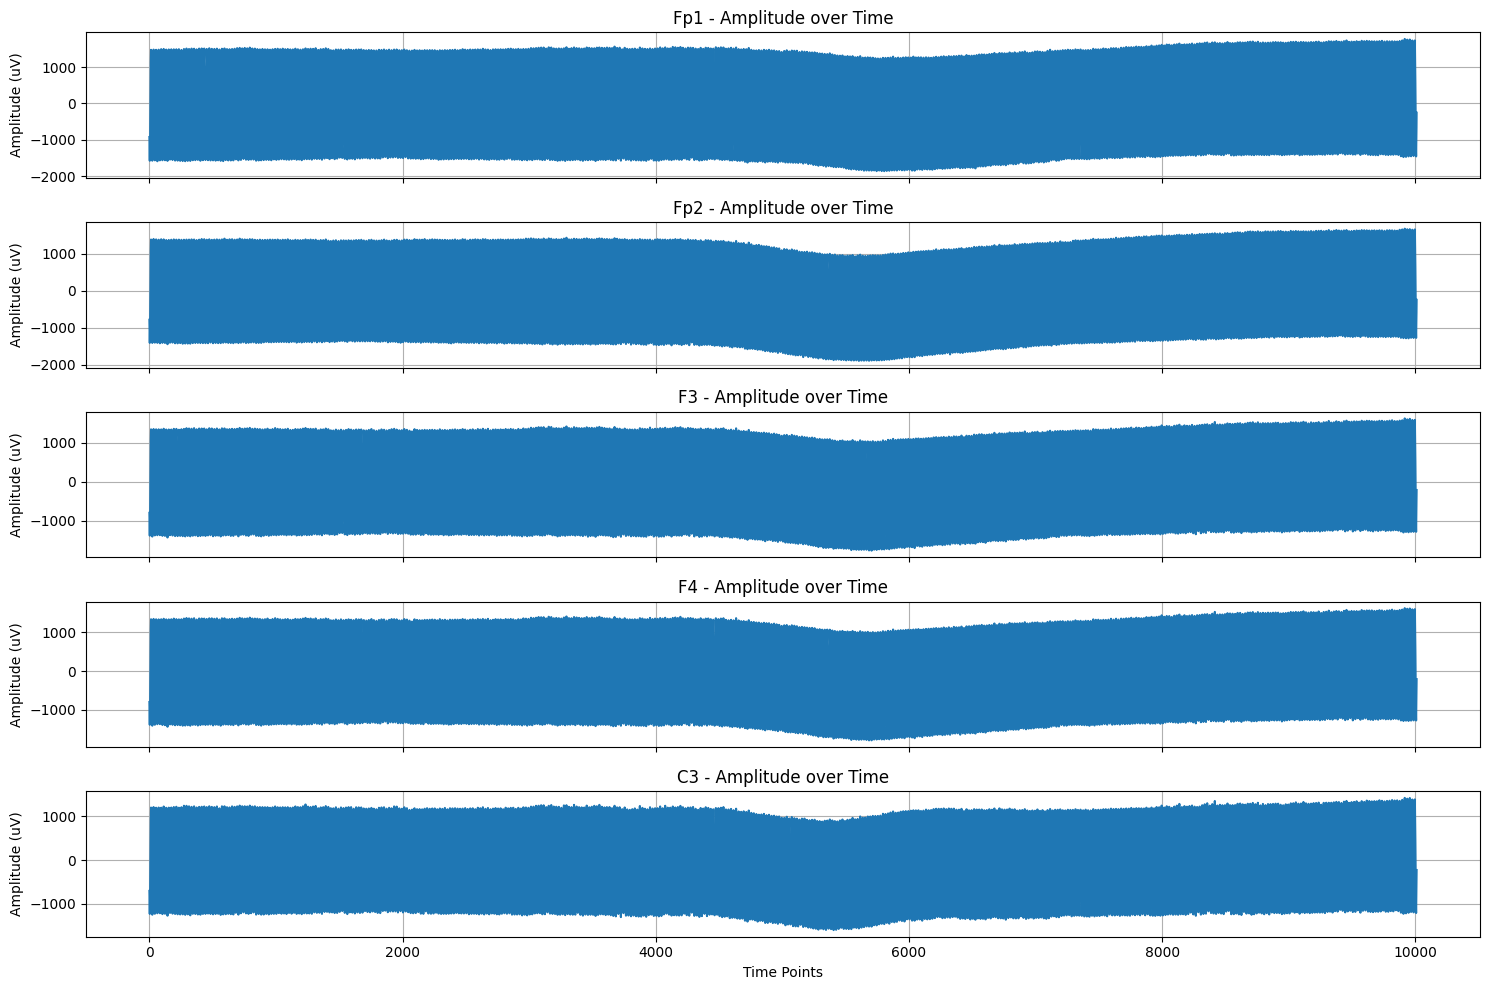

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame where each column is an EEG channel and each row is a time point
electrodes = ['Fp1', 'Fp2', 'F3', 'F4', 'C3']  # Replace with your actual channel names

plt.figure(figsize=(15, 10))
for i, electrode in enumerate(electrodes):
    plt.subplot(len(electrodes), 1, i + 1)
    plt.plot(data.index, data[electrode], label=electrode)
    plt.ylabel('Amplitude (uV)')
    plt.title(f'{electrode} - Amplitude over Time')
    plt.grid(True)
    if i == len(electrodes) - 1:
        plt.xlabel('Time Points')
    else:
        plt.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()



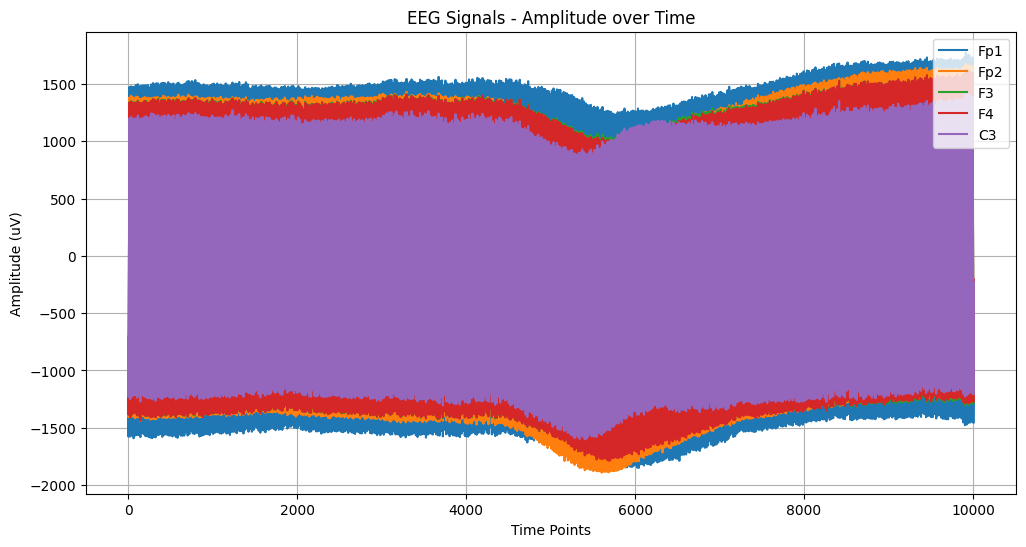

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame where each column is an EEG channel and each row is a time point
electrodes = ['Fp1', 'Fp2', 'F3', 'F4', 'C3']  # Replace with your actual channel names

plt.figure(figsize=(12, 6))
for electrode in electrodes:
    plt.plot(data.index, data[electrode], label=electrode)

plt.title('EEG Signals - Amplitude over Time')
plt.xlabel('Time Points')
plt.ylabel('Amplitude (uV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Topographical Map

In [4]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 147.9 MB/s eta 0:00:00


In [9]:
data.drop(['M1', 'M2', 'Time', 'Sample'], axis=1, inplace=True)

In [10]:
import mne
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame containing EEG signals
# Sample rate in Hz (e.g., 1000 Hz)
sfreq = 1000  # Adjust this to your actual sampling rate

# Channel names (electrode names)
ch_names = list(data.columns)

# Channel types ('eeg' for EEG data)
ch_types = ['eeg'] * len(ch_names)

# Create MNE info structure
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Convert DataFrame to numpy array
data_np = data.T.to_numpy()

# Create MNE RawArray object
raw = mne.io.RawArray(data_np, info)


Creating RawArray with float64 data, n_channels=30, n_times=10010
    Range : 0 ... 10009 =      0.000 ...    10.009 secs
Ready.


In [11]:
raw

<RawArray | 30 x 10010 (10.0 s), ~2.3 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


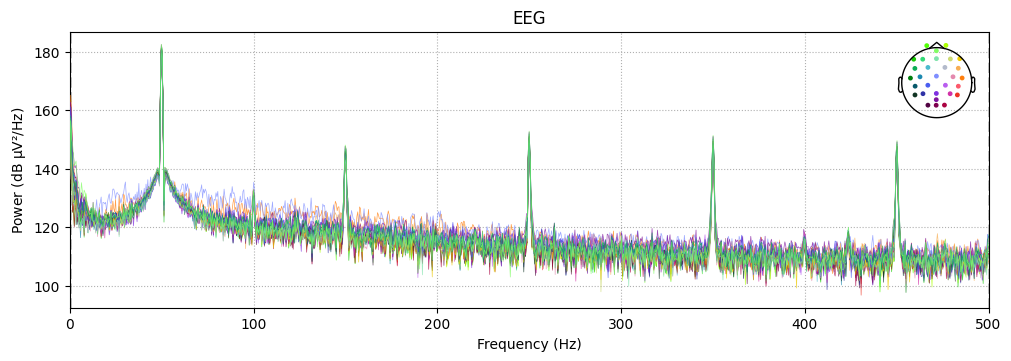

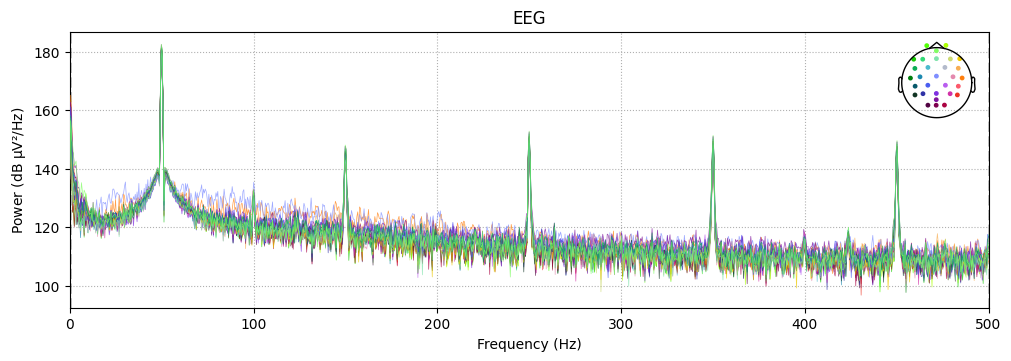

In [12]:
# import mne

# # Assuming the first column is an index and others are EEG channels
# channels = data.columns[1:]  # Adjust if different
# sampling_rate = 1000  # Adjust this according to your data specifics

# # Create an Info object (without the montage parameter)
# info = mne.create_info(ch_names=list(channels), sfreq=sampling_rate, ch_types='eeg')

# # Create the RawArray
# raw = mne.io.RawArray(data[channels].values.T, info)  # Transpose data to fit (n_channels, n_times)

# # Define the montage (electrode positions), assuming standard 10-20 system
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)  # Set the montage

# # Plotting the topographical map of EEG data
raw.plot_psd(tmax=np.inf)  # PSD plot
# raw.plot_projs_topomap()  # Topomap plot


In [7]:
# Example mapping: Adjust according to your actual electrode layout
channel_map = {
    '0': 'Fp1', '1': 'Fpz', '2': 'Fp2', '3': 'F7', '4': 'F3', '5': 'Fz', '6': 'F4', '7': 'F8',
    '8': 'FC5', '9': 'FC1', '10': 'FC2', '11': 'FC6', '12': 'M1', '13': 'T7', '14': 'C3', '15': 'Cz',
    '16': 'C4', '17': 'T8', '18': 'M2', '19': 'CP5', '20': 'CP1', '21': 'CP2', '22': 'CP6', '23': 'P7',
    '24': 'P3', '25': 'Pz', '26': 'P4', '27': 'P8', '28': 'POz', '29': 'O1', '30': 'Oz', '31': 'O2',
    '32': 'AF7', '33': 'AF3', '34': 'AF4', '35': 'AF8', '36': 'F5', '37': 'F1', '38': 'F2', '39': 'F6',
    '40': 'FT7', '41': 'FC3', '42': 'FC4', '43': 'FT8', '44': 'TP7', '45': 'C5', '46': 'C1', '47': 'C2',
    '48': 'C6', '49': 'TP8', '50': 'CP3', '51': 'CP4', '52': 'P5', '53': 'P1', '54': 'P2', '55': 'P6',
    '56': 'PO5', '57': 'PO3', '58': 'PO4', '59': 'PO6', '60': 'CB1', '61': 'CB2', '62': 'S1', '63': 'S2'
}

# Rename channels
data.rename(columns=channel_map, inplace=True, index=None)

In [13]:
data.head()

,Fp1,Fp2,F7,F8,F3,F4,Fz,C3,C4,Cz,...,FC2,FC5,FC6,CP1,CP2,CP5,CP6,POz,Oz,AFz
0,-925.25,-781.75,-773.75,-856.25,-801.00,-798.25,-725.50,-704.50,-724.25,-800.75,...,-1046.00,-1009.75,-915.25,-878.00,-869.00,-940.5,-932.50,-1110.00,-880.00,-1167.75
1,-1218.75,-1051.75,-1041.25,-1130.50,-1067.50,-1060.25,-956.75,-943.25,-947.25,-1079.75,...,-1338.25,-1308.50,-1213.75,-1131.00,-1124.50,-1234.0,-1229.50,-1427.75,-1133.50,-1480.00
2,-1488.25,-1307.25,-1298.50,-1378.00,-1305.00,-1302.00,-1166.50,-1155.25,-1148.75,-1353.50,...,-1608.00,-1570.50,-1473.25,-1366.50,-1355.25,-1495.5,-1486.75,-1716.00,-1359.75,-1767.00
3,-1578.75,-1407.00,-1395.75,-1464.00,-1387.25,-1385.75,-1236.00,-1231.00,-1232.50,-1425.50,...,-1677.50,-1656.25,-1550.50,-1437.25,-1428.00,-1576.5,-1575.25,-1788.00,-1426.25,-1851.25
4,-1379.75,-1250.50,-1238.00,-1280.25,-1204.00,-1206.25,-1081.50,-1080.50,-1071.50,-1235.00,...,-1414.75,-1414.75,-1341.25,-1233.50,-1225.00,-1352.5,-1351.25,-1525.75,-1212.00,-1559.50


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


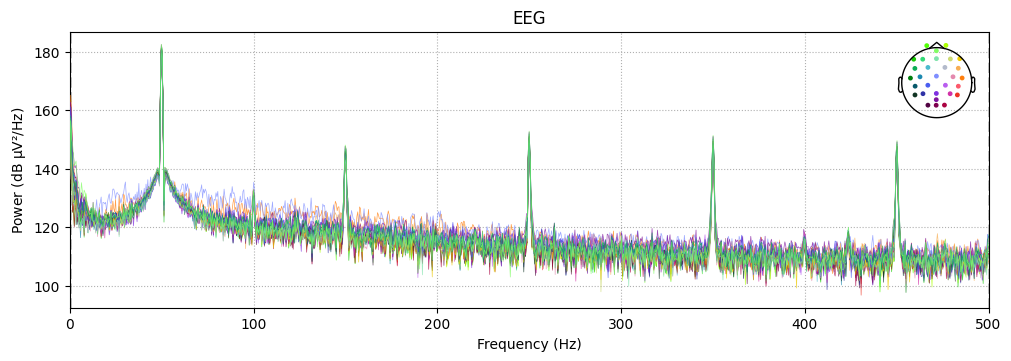

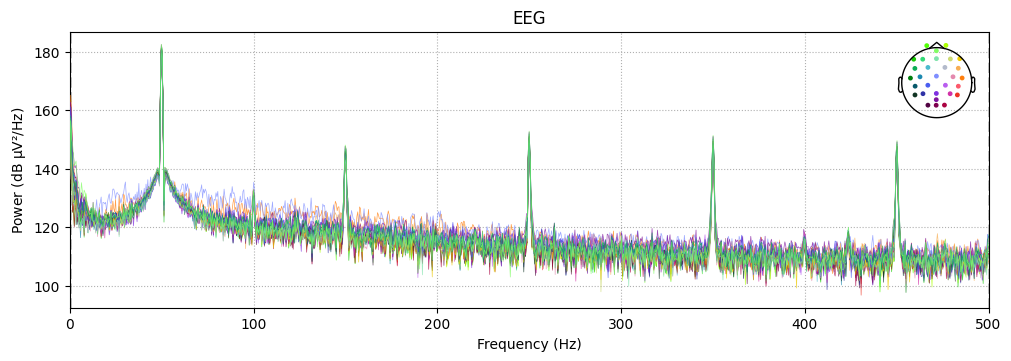

In [17]:
import mne
# Select only the columns that are actually mapped (ignores unmapped channels)

# Create the RawArray with the data from the channels we are using
# raw = mne.io.RawArray(data.T.to_numpy())

# Define the montage (electrode positions)
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage, ignoring channels that are not present in the montage
raw.set_montage(montage, on_missing='ignore')

# Visualize the data
raw.plot_psd(fmax=500)  # Showing PSD up to 50 Hz
# raw.plot_projs_topomap()  # Topomap

In [18]:
# Plot the EEG data
# Assuming you have an Evoked object
evoked = raw.copy().filter(1, 40).average()
evoked.plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


AttributeError: 'RawArray' object has no attribute 'average'